<a href="https://colab.research.google.com/github/patience275/ubereats-prediction/blob/main/ubereats_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/uber eats/uber-eats-deliveries.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

## y cols

In [ ]:
y_cols=df['Time_taken(min)']
y_cols.head()

,Time_taken(min)
0,(min) 24
1,(min) 33
2,(min) 26
3,(min) 21
4,(min) 30


In [ ]:
y_cols = y_cols.str.replace(r"\s*\(min\)", "", regex=True)
y_cols.head()

,Time_taken(min)
0,24
1,33
2,26
3,21
4,30


In [ ]:
y_cols.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_taken(min)
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
y_cols=y_cols.astype(int)
y_cols.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_taken(min)
Non-Null Count  Dtype
--------------  -----
45593 non-null  int64
dtypes: int64(1)
memory usage: 356.3 KB


In [ ]:
y_cols.unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [ ]:
y_cols.describe()

,Time_taken(min)
count,45593.000000
mean,26.294607
std,9.383806
min,10.000000
25%,19.000000
50%,26.000000
75%,32.000000
max,54.000000


In [ ]:
y_cols_count=y_cols.value_counts()
y_cols_count

,count
Time_taken(min),
26,2123
25,2050
27,1976
28,1965
29,1956
19,1824
15,1810
18,1765
16,1706


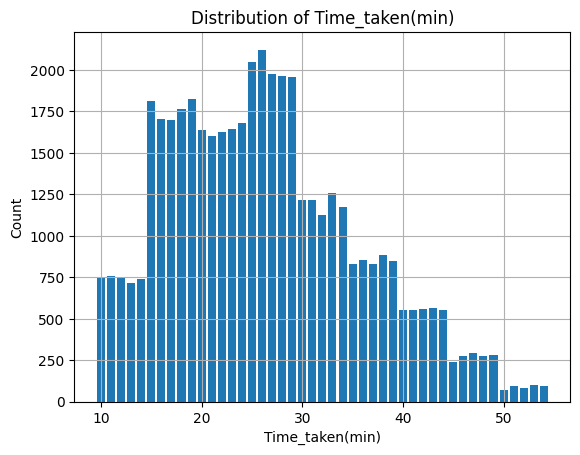

In [ ]:
import matplotlib.pyplot as plt
plt.bar(y_cols_count.index, y_cols_count.values)
plt.xlabel('Time_taken(min)')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Time_taken(min)')
plt.show()

In [ ]:
y_cols.to_csv('y_cols.csv', index=False)

##x

In [ ]:
df1=df.drop('Time_taken(min)', axis=1)
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian


## delivery person age

In [ ]:
df1['Delivery_person_Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Age
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Delivery_person_Age'].isna().sum()

np.int64(0)

In [ ]:
df1['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [ ]:
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].replace('NaN ', 0)
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)
mean=df1['Delivery_person_Age'].mean()
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].replace(0, mean)

In [ ]:
dpa_count=df1['Delivery_person_Age'].value_counts()

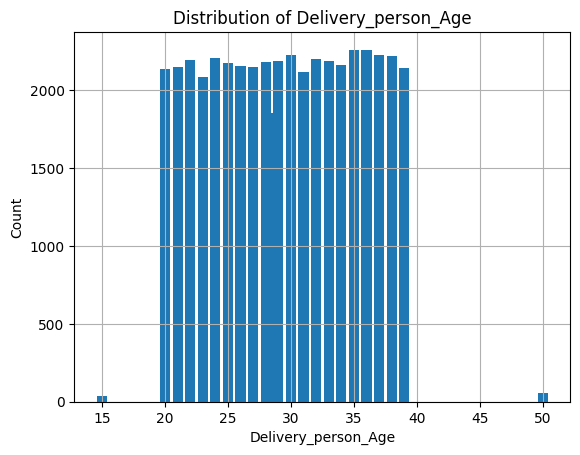

In [ ]:
plt.bar(dpa_count.index, dpa_count.values)
plt.xlabel('Delivery_person_Age')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Delivery_person_Age')
plt.show()


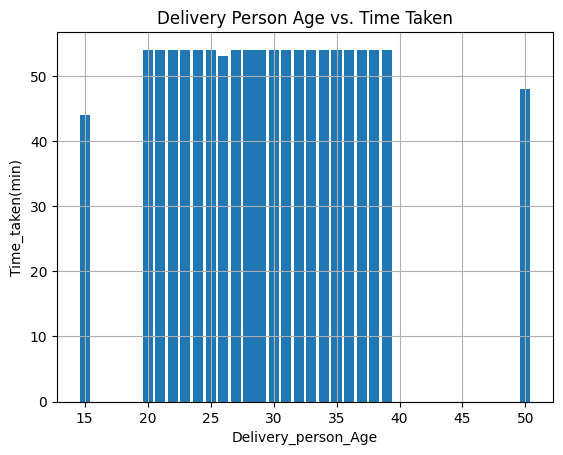

In [ ]:


plt.bar(df1['Delivery_person_Age'], y_cols)
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken(min)')
plt.title('Delivery Person Age vs. Time Taken')
plt.grid(True)
plt.show()

## delivery persons rating

In [ ]:
df1['Delivery_person_Ratings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Ratings
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Delivery_person_Ratings'].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 'NaN ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
       '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [ ]:
df1['Delivery_person_Ratings']=df1['Delivery_person_Ratings'].replace('NaN',0)
df1['Delivery_person_Ratings']=df1['Delivery_person_Ratings'].astype(float)
mean=df1['Delivery_person_Ratings'].mean()
df1['Delivery_person_Ratings']=df1['Delivery_person_Ratings'].replace(0,mean)

In [ ]:
dpr_count=df1['Delivery_person_Ratings'].value_counts()
dpr_count

,count
Delivery_person_Ratings,
4.8,7148
4.7,7142
4.9,7041
4.6,6940
5.0,3996
4.5,3303
4.1,1430
4.2,1418
4.3,1409


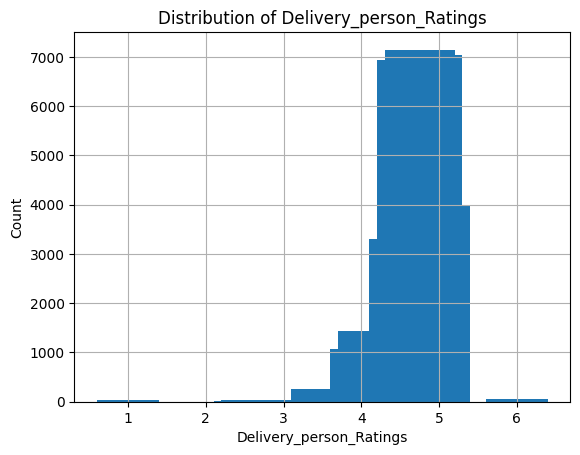

In [ ]:
plt.bar(dpr_count.index, dpr_count.values)
plt.xlabel('Delivery_person_Ratings')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Delivery_person_Ratings')
plt.show()

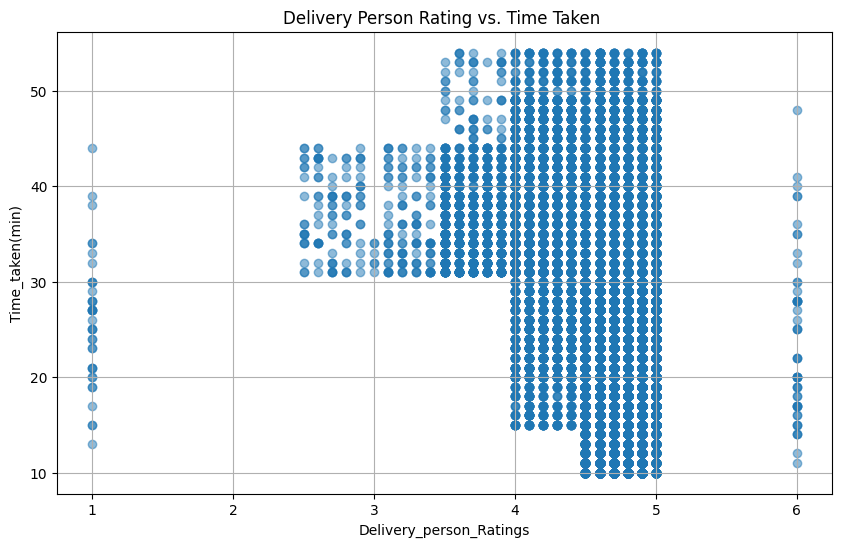

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(df1['Delivery_person_Ratings'], y_cols, alpha=0.5)
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time_taken(min)')
plt.title('Delivery Person Rating vs. Time Taken ')
plt.grid(True)
plt.show()

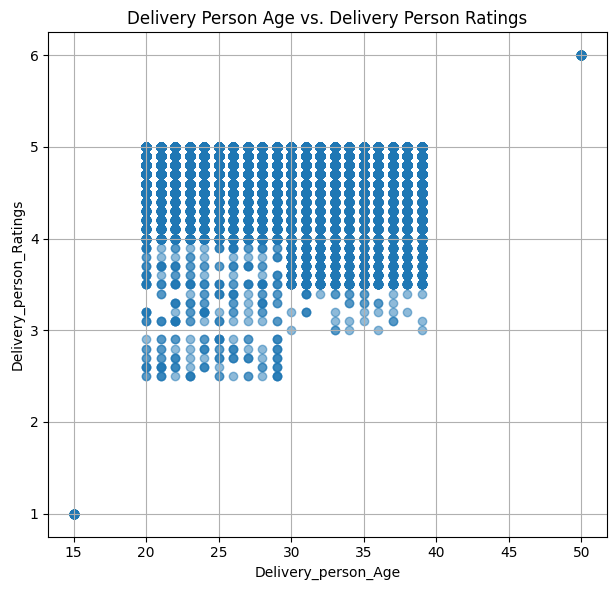

In [ ]:


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df1['Delivery_person_Age'], df1['Delivery_person_Ratings'], alpha=0.5)
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.title('Delivery Person Age vs. Delivery Person Ratings')
plt.grid(True)

plt.tight_layout()
plt.show()


## time

In [ ]:
from datetime import datetime

In [ ]:
df1['Order_Date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [ ]:


df1['Order_Date'] = pd.to_datetime(df1['Order_Date'])
df1['Day_of_Week'] = df1['Order_Date'].dt.day_name()
df1['Day_of_Week'].unique()

array(['Saturday', 'Friday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
df1=df1.drop(columns=('Order_Date'))

In [ ]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday


In [ ]:
df1['Day_of_Week'].value_counts()

,count
Day_of_Week,
Wednesday,7093
Friday,7031
Tuesday,6375
Thursday,6348
Saturday,6290
Sunday,6249
Monday,6207


In [ ]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday


In [ ]:
df1['Time_Orderd'].unique()

array(['11:30:00', '19:45:00', '08:30:00', '18:00:00', '13:30:00',
       '21:20:00', '19:15:00', '17:25:00', '20:55:00', '21:55:00',
       '14:55:00', '17:30:00', '09:20:00', '19:50:00', '20:25:00',
       '20:30:00', '20:40:00', '21:15:00', '20:20:00', '22:30:00',
       '08:15:00', '19:30:00', '12:25:00', '18:35:00', '20:35:00',
       '23:20:00', '23:35:00', '22:35:00', '23:25:00', '13:35:00',
       '21:35:00', '18:55:00', '14:15:00', '11:00:00', '09:45:00',
       '08:40:00', '23:00:00', 'NaN ', '19:10:00', '10:55:00', '21:40:00',
       '19:00:00', '16:45:00', '15:10:00', '22:45:00', '22:10:00',
       '20:45:00', '22:50:00', '17:55:00', '09:25:00', '20:15:00',
       '22:25:00', '22:40:00', '23:50:00', '15:25:00', '10:20:00',
       '10:40:00', '15:55:00', '20:10:00', '12:10:00', '15:30:00',
       '10:35:00', '21:10:00', '20:50:00', '12:35:00', '21:00:00',
       '23:40:00', '18:15:00', '18:20:00', '11:45:00', '12:45:00',
       '23:30:00', '10:50:00', '21:25:00', '10:10:00',

In [ ]:
# prompt: replcae the 'NaN ' values in the time ordered  with the mode\

# Replace 'NaN ' values with '00:00:00'
df1['Time_Orderd'] = df1['Time_Orderd'].str.replace('NaN ', '00:00:00')

# Convert 'Time_Orderd' to datetime objects
df1['Time_Orderd'] = pd.to_datetime(df1['Time_Orderd'])

# Calculate the mode of the 'Time_Orderd' column, handling potential NaN values
mode_time = df1['Time_Orderd'].mode()[0]

# Replace '00:00:00' values with the calculated mode
df1['Time_Orderd'] = df1['Time_Orderd'].replace(pd.to_datetime('00:00:00'), mode_time)

# Verify the changes
df1['Time_Orderd'].info()
df1['Time_Orderd'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_Orderd
Non-Null Count  Dtype         
--------------  -----         
45593 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 356.3 KB


<DatetimeArray>
['2025-07-02 11:30:00', '2025-07-02 19:45:00', '2025-07-02 08:30:00',
 '2025-07-02 18:00:00', '2025-07-02 13:30:00', '2025-07-02 21:20:00',
 '2025-07-02 19:15:00', '2025-07-02 17:25:00', '2025-07-02 20:55:00',
 '2025-07-02 21:55:00',
 ...
 '2025-07-02 13:15:00', '2025-07-02 14:00:00', '2025-07-02 15:40:00',
 '2025-07-02 16:25:00', '2025-07-02 14:10:00', '2025-07-02 13:45:00',
 '2025-07-02 13:55:00', '2025-07-02 14:35:00', '2025-07-02 16:30:00',
 '2025-07-02 14:45:00']
Length: 176, dtype: datetime64[ns]

In [ ]:
# prompt: calculate the difference between time ordered and time order picked

# Assuming 'Time_Order_picked' is the column name
df1['Time_Order_picked'] = pd.to_datetime(df1['Time_Order_picked'])
df1['Time_Difference'] = (df1['Time_Order_picked'] - df1['Time_Orderd']).dt.total_seconds() / 60  # Difference in minutes

print(df1['Time_Difference'].head())
df1['Time_Difference'].describe()
df1['Time_Difference'].unique()

0    15.0
1     5.0
2    15.0
3    10.0
4    15.0
Name: Time_Difference, dtype: float64


array([   15.,     5.,    10.,  1115.,   930., -1425.,  1105.,  1420.,
       -1430.,  1070.,  1250.,  1285.,  1325.,  1185.,  1360.,  1385.,
        1075., -1435.,  1355.,  1350.,  1090.,   780.,  1365.,   730.,
         720.,  1225.,   665.,   645.,  1110.,   650.,  1430.,  1265.,
        1220.,  1305.,  1235.,  1095.,   610.,  1165.,  1195.,   845.,
        1140.,  1050.,   570.,   520.,  1190.,  1405.,  1080.,  1290.,
        1230.,   585.,   925.,  1040.,  1035.,  1210.,  1160.,   515.,
         770.,   745.,   835.,  1400.,   915.,   550.,  1085.,  1410.,
        1240.,  1145.,  1135.,  1170.,  1375.,     0.,   900.,  1245.,
         575.,  1100.,  1340.,   560.,  1125.,   505.,   955.,  1415.,
        1260.,  1330.,  1295.,   715.,  1270.,  1345.,   540.,   605.,
        1370.,  1015.,   880.,   685.,  1395.,   750.,   905.,  1275.,
        1045.,  1425.,  1310.,  1205.,  1180.,  1010.,  1130.,   725.,
         755.,   660.,  1065.,  1390.,  1200.,   600.,  1335.,  1215.,
      

In [ ]:
df1['Time_Order_picked'].unique()

<DatetimeArray>
['2025-07-02 11:45:00', '2025-07-02 19:50:00', '2025-07-02 08:45:00',
 '2025-07-02 18:10:00', '2025-07-02 13:45:00', '2025-07-02 21:30:00',
 '2025-07-02 19:30:00', '2025-07-02 17:30:00', '2025-07-02 21:05:00',
 '2025-07-02 22:10:00',
 ...
 '2025-07-02 17:10:00', '2025-07-02 15:25:00', '2025-07-02 14:20:00',
 '2025-07-02 12:35:00', '2025-07-02 14:00:00', '2025-07-02 14:10:00',
 '2025-07-02 14:55:00', '2025-07-02 13:15:00', '2025-07-02 14:50:00',
 '2025-07-02 16:00:00']
Length: 193, dtype: datetime64[ns]

In [ ]:
df1.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Day_of_Week', 'Time_Difference'],
      dtype='object')

In [ ]:
df1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week,Time_Difference
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2025-07-02 11:30:00,2025-07-02 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2025-07-02 19:45:00,2025-07-02 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2025-07-02 08:30:00,2025-07-02 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2025-07-02 18:00:00,2025-07-02 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2025-07-02 13:30:00,2025-07-02 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday,15.0


In [ ]:
df1=df1.drop(columns=['ID', 'Delivery_person_ID','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude','Time_Difference'])

In [ ]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week
0,37.0,4.9,2025-07-02 11:30:00,2025-07-02 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday
1,34.0,4.5,2025-07-02 19:45:00,2025-07-02 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday
2,23.0,4.4,2025-07-02 08:30:00,2025-07-02 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday
3,38.0,4.7,2025-07-02 18:00:00,2025-07-02 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday
4,32.0,4.6,2025-07-02 13:30:00,2025-07-02 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday


In [ ]:

nan_count = df['Time_Orderd'].astype(str).str.count('NaN ').sum()
print(f"Number of 'NaN ' values in 'Time_Orderd': {nan_count}")

Number of 'NaN ' values in 'Time_Orderd': 1731


In [ ]:
df1['Time_Orderd'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_Orderd
Non-Null Count  Dtype         
--------------  -----         
45593 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 356.3 KB


In [ ]:
df1.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Day_of_Week',
       'Time_Difference_minutes'],
      dtype='object')

In [ ]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week,Time_Difference_minutes
0,37.0,4.9,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday,15.0
1,34.0,4.5,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday,5.0
2,23.0,4.4,1900-01-01 08:30:00,1900-01-01 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday,15.0
3,38.0,4.7,1900-01-01 18:00:00,1900-01-01 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday,10.0
4,32.0,4.6,1900-01-01 13:30:00,1900-01-01 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday,15.0


## weatherconditions

In [ ]:
df1['Weatherconditions'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Weatherconditions
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [ ]:
df1['Weatherconditions']=df1['Weatherconditions'].replace('conditions NaN','unknown')
df1['Weatherconditions'] = df1['Weatherconditions'].str.replace("conditions", "", regex=True)

In [ ]:
weather_counts=df1['Weatherconditions'].value_counts()
weather_counts

,count
Weatherconditions,
Fog,7654
Stormy,7586
Cloudy,7536
Sandstorms,7495
Windy,7422
Sunny,7284
unknown,616


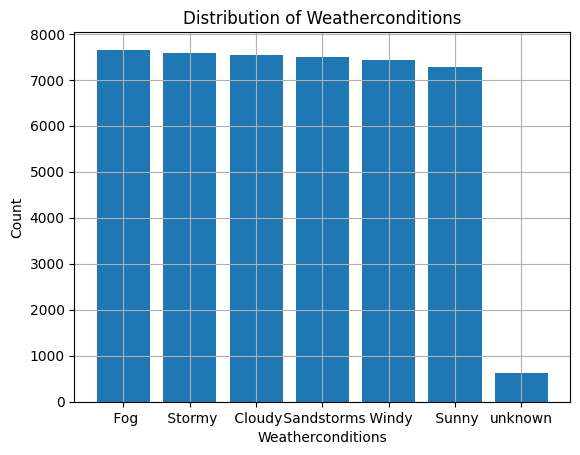

In [ ]:
plt.bar(weather_counts.index, weather_counts.values)
plt.xlabel('Weatherconditions')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Weatherconditions')
plt.show()

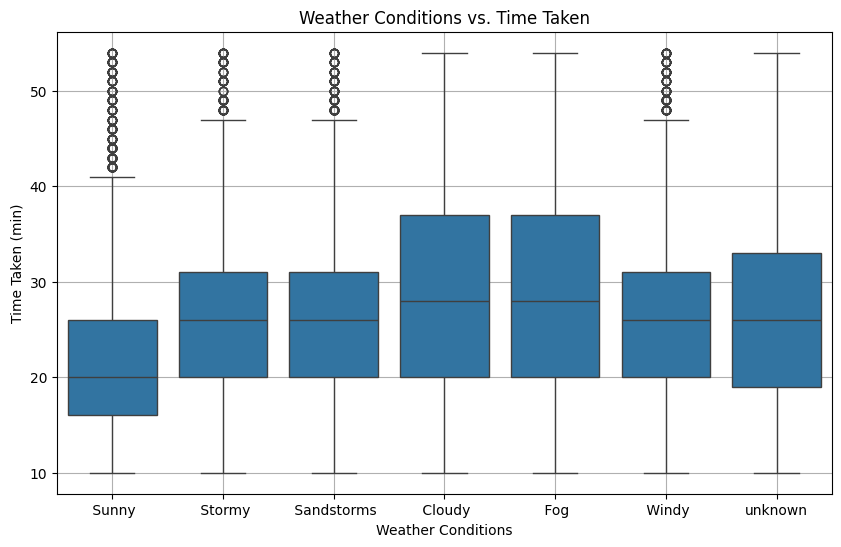

In [ ]:


import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x='Weatherconditions', y=y_cols, data=df1)
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.title('Weather Conditions vs. Time Taken')
plt.grid(True)
plt.show()

## road traffic

In [ ]:
df1['Road_traffic_density'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Road_traffic_density
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [ ]:
df1['Road_traffic_density']=df1['Road_traffic_density'].replace('NaN','unknown')
df1['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [ ]:
rtd_count=df1['Road_traffic_density'].value_counts()
rtd_count

,count
Road_traffic_density,
Low,15477
Jam,14143
Medium,10947
High,4425
NaN,601


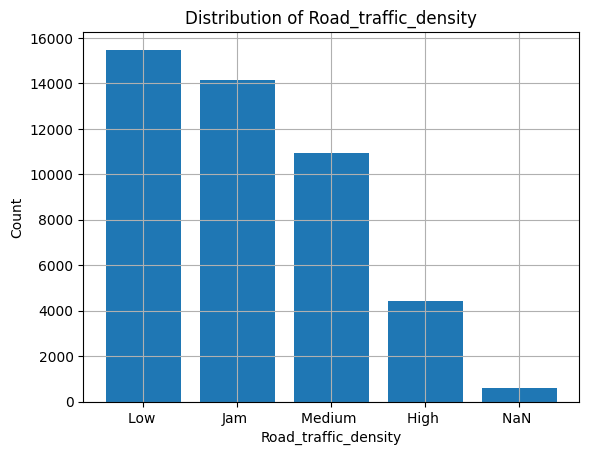

In [ ]:
plt.bar(rtd_count.index, rtd_count.values)
plt.xlabel('Road_traffic_density')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Road_traffic_density')
plt.show()

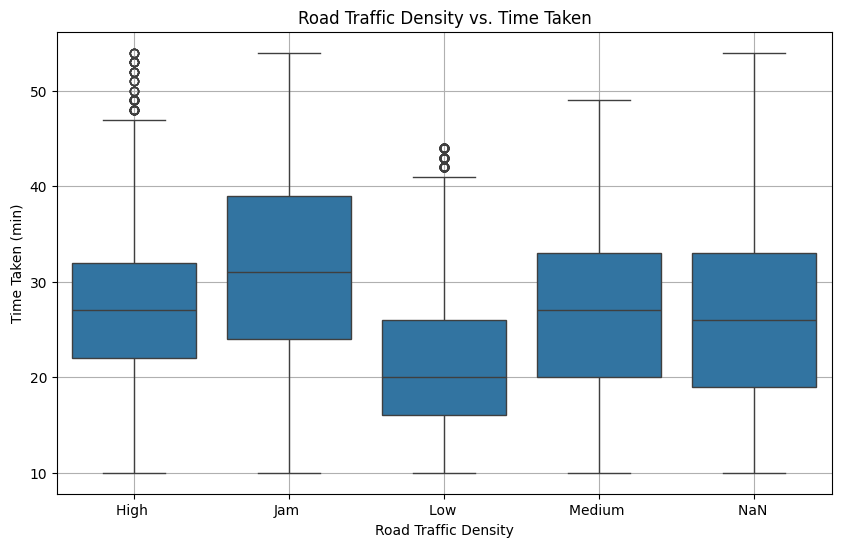

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_traffic_density', y=y_cols, data=df1)
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.title('Road Traffic Density vs. Time Taken')
plt.grid(True)
plt.show()

## vehicle condition

In [ ]:
df1['Vehicle_condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Vehicle_condition
Non-Null Count  Dtype
--------------  -----
45593 non-null  int64
dtypes: int64(1)
memory usage: 356.3 KB


In [ ]:
df1['Vehicle_condition'].unique()

array([2, 0, 1, 3])

In [ ]:
vc_counts=df1['Vehicle_condition'].value_counts()
vc_counts

,count
Vehicle_condition,
2,15034
1,15030
0,15009
3,520


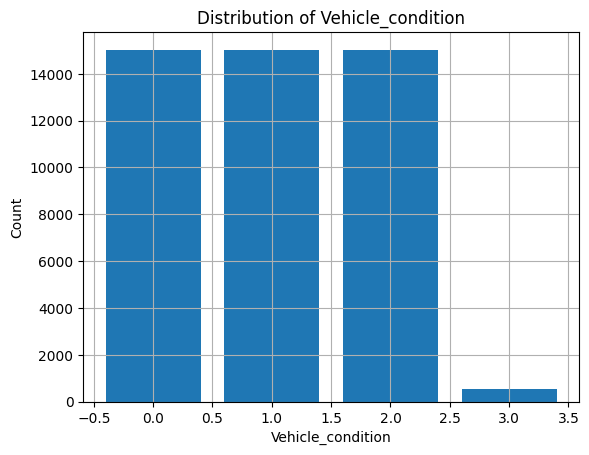

In [ ]:
plt.bar(vc_counts.index, vc_counts.values)
plt.xlabel('Vehicle_condition')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Vehicle_condition')
plt.show()
#

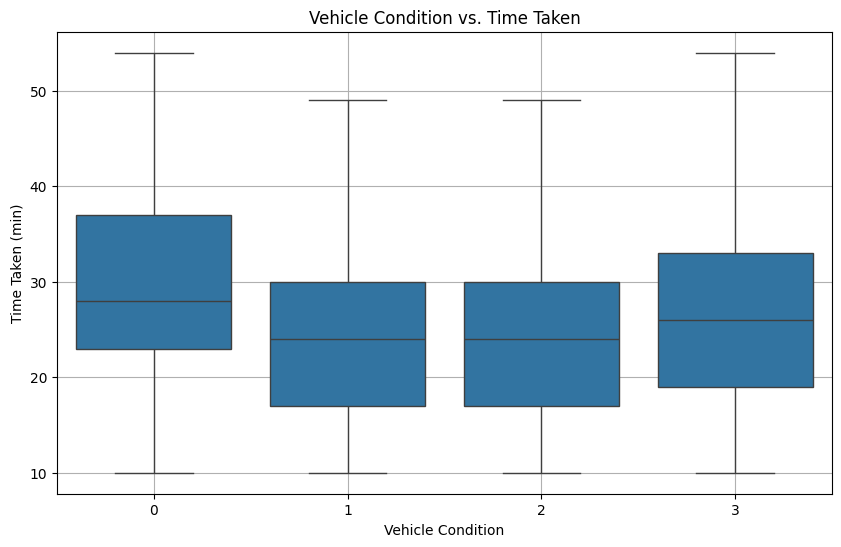

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_condition', y=y_cols, data=df1)
plt.xlabel('Vehicle Condition')
plt.ylabel('Time Taken (min)')
plt.title('Vehicle Condition vs. Time Taken')
plt.grid(True)
plt.show()

## type of order

In [ ]:
df1['Type_of_order'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Type_of_order
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [ ]:
to_count=df1['Type_of_order'].value_counts()
to_count

,count
Type_of_order,
Snack,11533
Meal,11458
Drinks,11322
Buffet,11280


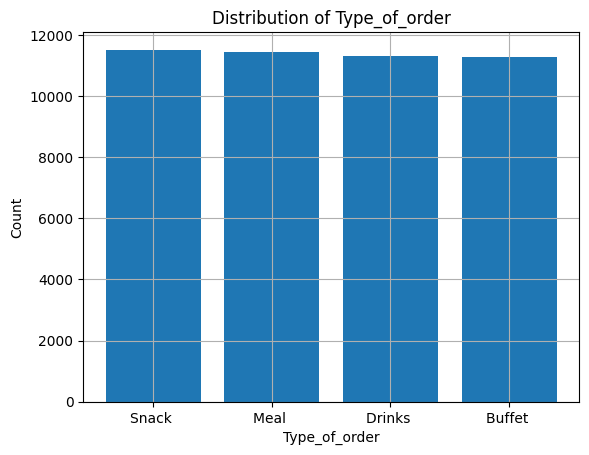

In [ ]:
plt.bar(to_count.index, to_count.values)
plt.xlabel('Type_of_order')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Type_of_order')
plt.show()
#

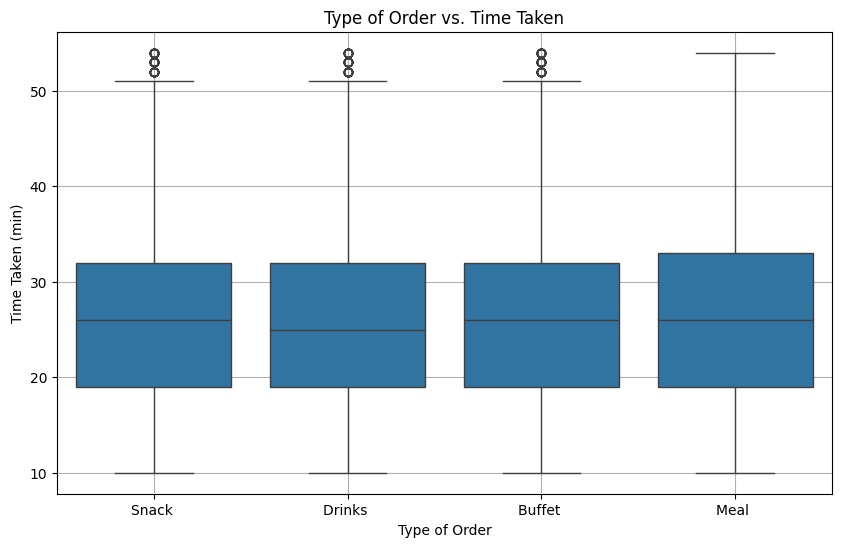

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_order', y=y_cols, data=df1)
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.title('Type of Order vs. Time Taken')
plt.grid(True)
plt.show()

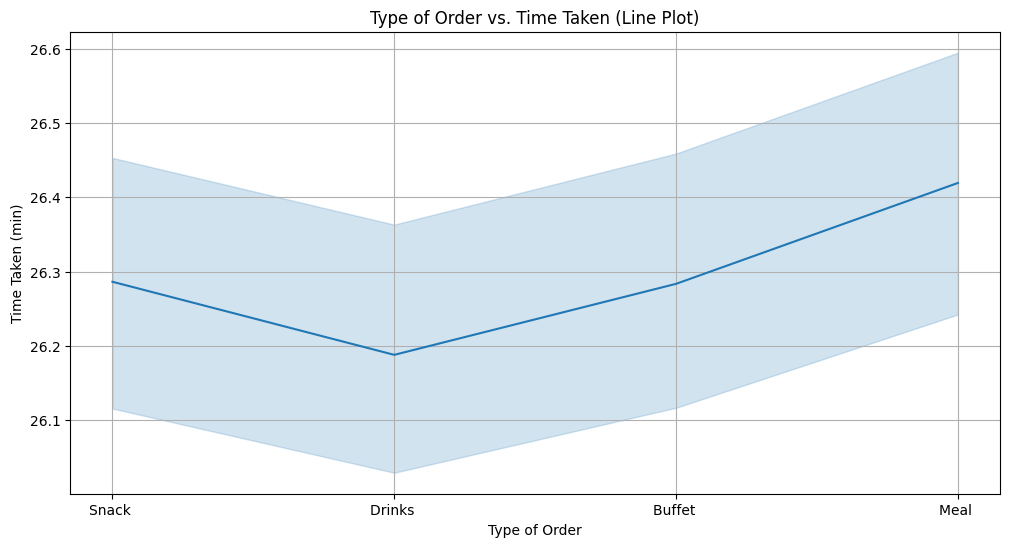

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Type_of_order', y=y_cols, data=df1)
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.title('Type of Order vs. Time Taken (Line Plot)')
plt.grid(True)
plt.show()

## type of vehicle

In [ ]:
df1['Type_of_vehicle'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Type_of_vehicle
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [ ]:
tv_count=df1['Type_of_vehicle'].value_counts()
tv_count

,count
Type_of_vehicle,
motorcycle,26435
scooter,15276
electric_scooter,3814
bicycle,68


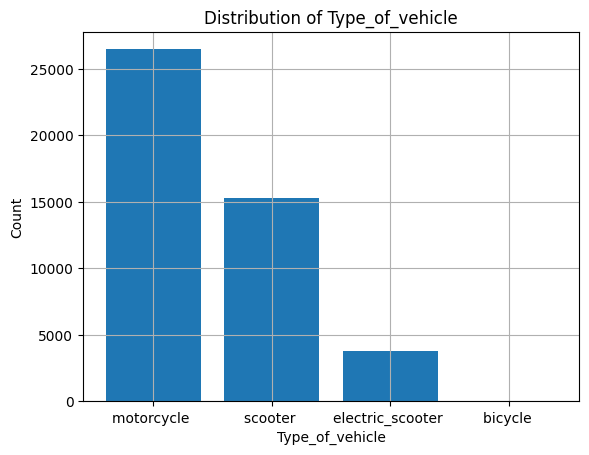

In [ ]:
plt.bar(tv_count.index, tv_count.values)
plt.xlabel('Type_of_vehicle')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Type_of_vehicle')
plt.show()

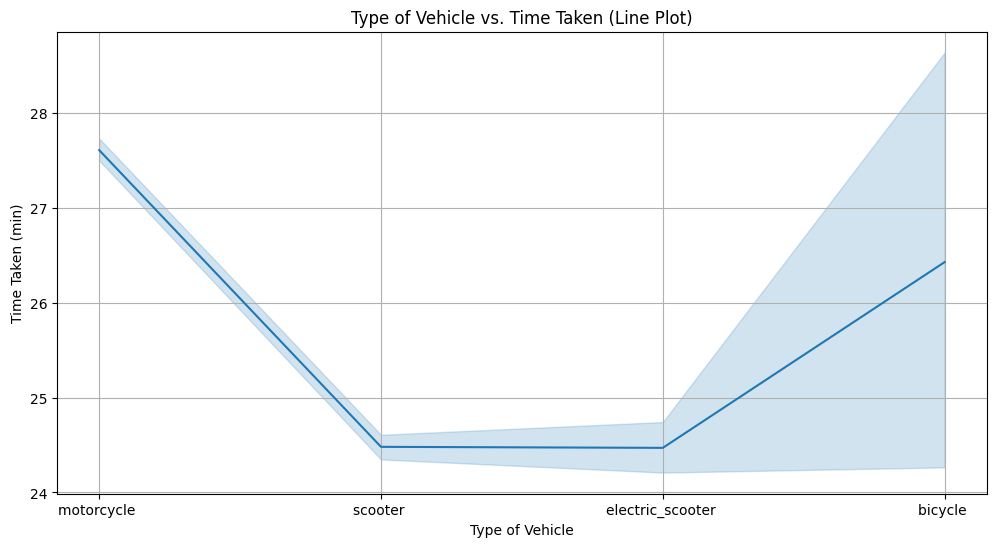

In [ ]:


plt.figure(figsize=(12, 6))
sns.lineplot(x='Type_of_vehicle', y=y_cols, data=df1)
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.title('Type of Vehicle vs. Time Taken (Line Plot)')
plt.grid(True)
plt.show()

## multiple deliveries

In [ ]:
df1['multiple_deliveries'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: multiple_deliveries
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [ ]:
df1['multiple_deliveries']=df1['multiple_deliveries'].replace('NaN ',4) # Replace 'NaN ' (with a space)
df1['multiple_deliveries']=df1['multiple_deliveries'].astype(float).astype(int)

In [ ]:
md_count=df1['multiple_deliveries'].value_counts()
md_count

,count
multiple_deliveries,
1,28159
0,14095
2,1985
4,993
3,361


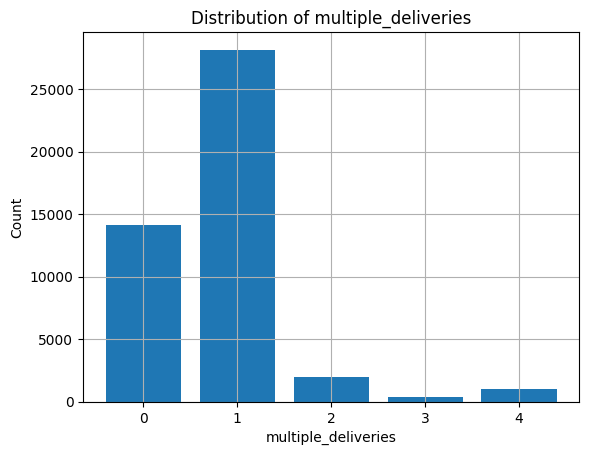

In [ ]:
plt.bar(md_count.index, md_count.values)
plt.xlabel('multiple_deliveries')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of multiple_deliveries')
plt.show()
#

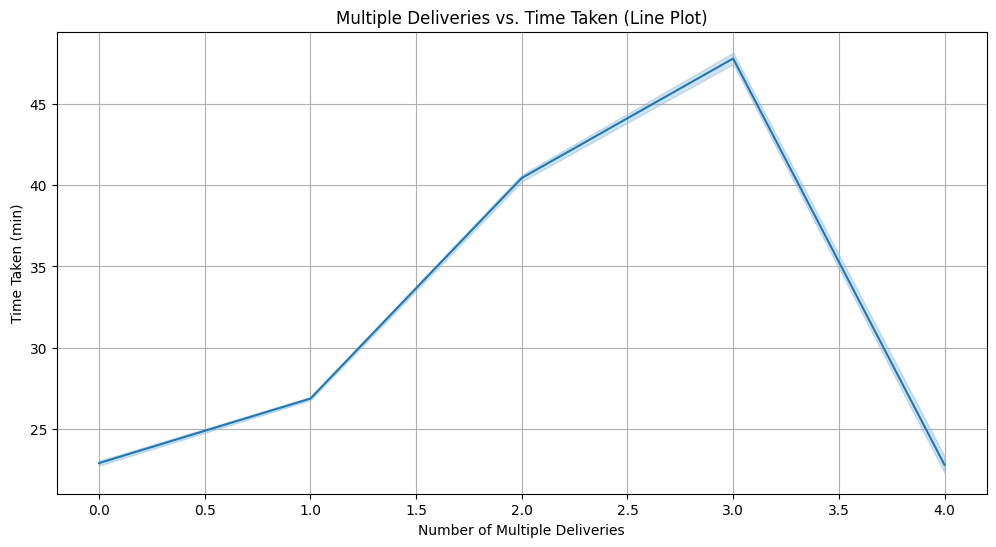

In [ ]:


plt.figure(figsize=(12, 6))
sns.lineplot(x='multiple_deliveries', y=y_cols, data=df1)
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Time Taken (min)')
plt.title('Multiple Deliveries vs. Time Taken (Line Plot)')
plt.grid(True)
plt.show()

## festival

In [ ]:
df1['Festival'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Festival
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['Festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [ ]:
df1['Festival']=df1['Festival'].replace('NaN ','unknown')
df1['Festival'].unique()

array(['No ', 'Yes ', 'unknown'], dtype=object)

In [ ]:
fest_count=df1['Festival'].value_counts()
fest_count

,count
Festival,
No,44469
Yes,896
unknown,228


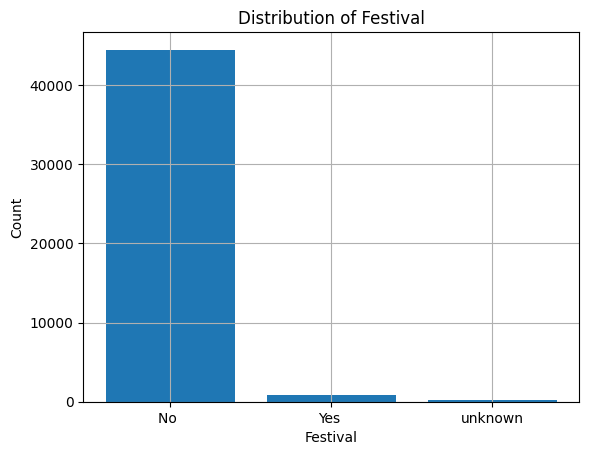

In [ ]:
plt.bar(fest_count.index, fest_count.values)
plt.xlabel('Festival')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Festival')
plt.show()

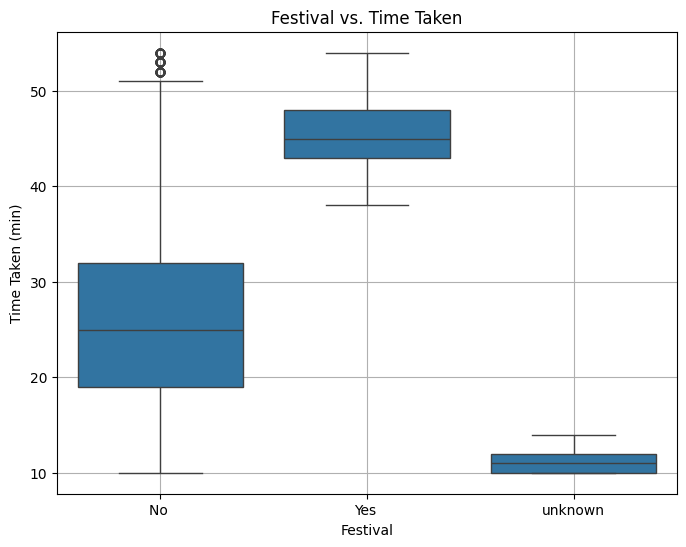

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='Festival', y=y_cols, data=df1)
plt.xlabel('Festival')
plt.ylabel('Time Taken (min)')
plt.title('Festival vs. Time Taken')
plt.grid(True)
plt.show()

## city

In [ ]:
df1['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
df1['City'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [ ]:
df1['City']=df1['City'].replace('NaN ','unknown')

In [ ]:
city_count=df1['City'].value_counts()
city_count

,count
City,
Metropolitian,34093
Urban,10136
unknown,1200
Semi-Urban,164


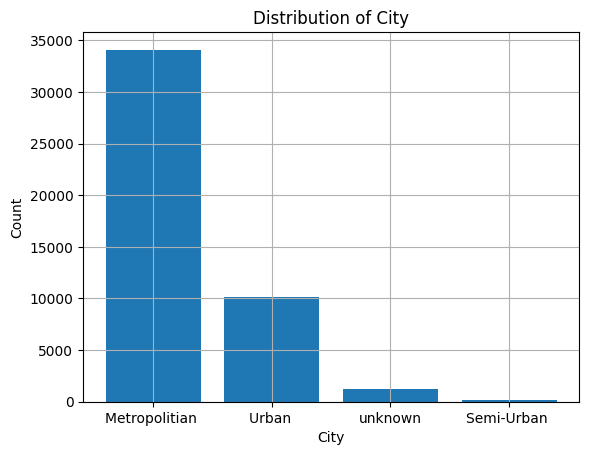

In [ ]:
plt.bar(city_count.index, city_count.values)
plt.xlabel('City')
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of City')
plt.show()

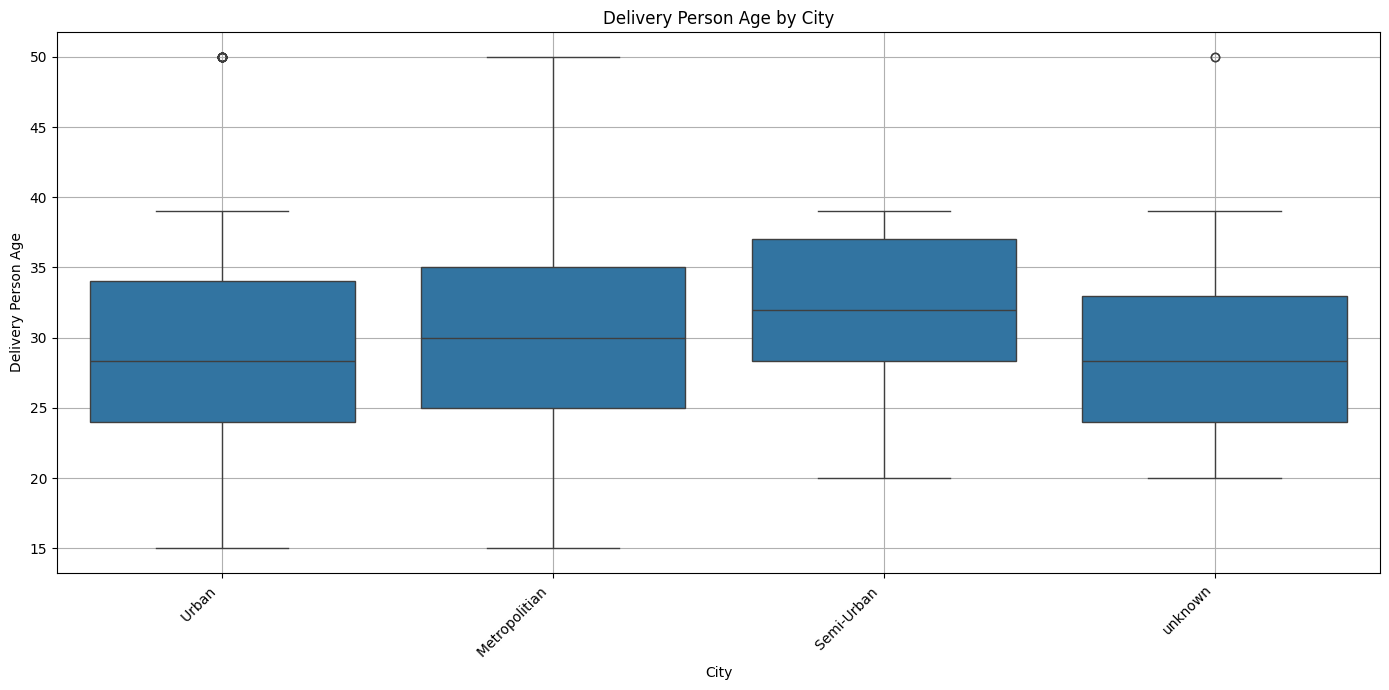

In [ ]:


plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y='Delivery_person_Age', data=df1)
plt.xlabel('City')
plt.ylabel('Delivery Person Age')
plt.title('Delivery Person Age by City')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

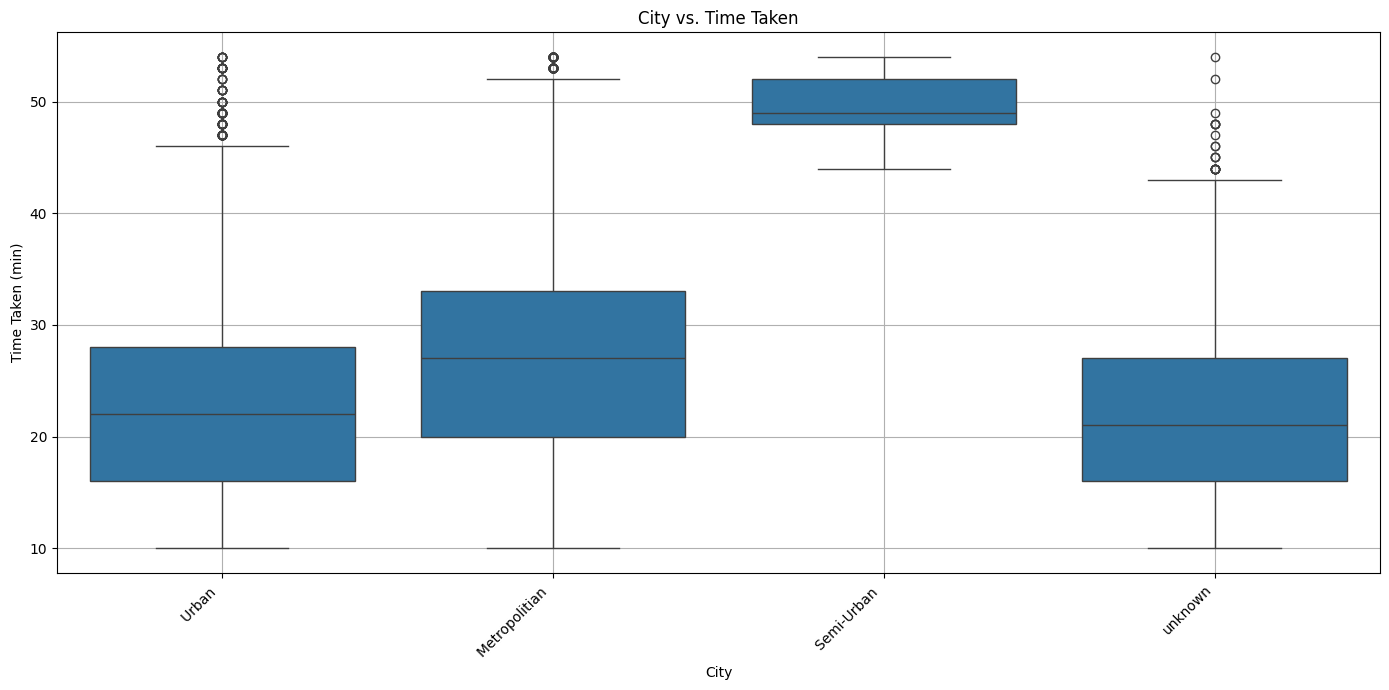

In [ ]:


plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y=y_cols, data=df1)
plt.xlabel('City')
plt.ylabel('Time Taken (min)')
plt.title('City vs. Time Taken')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels overlapping
plt.show()

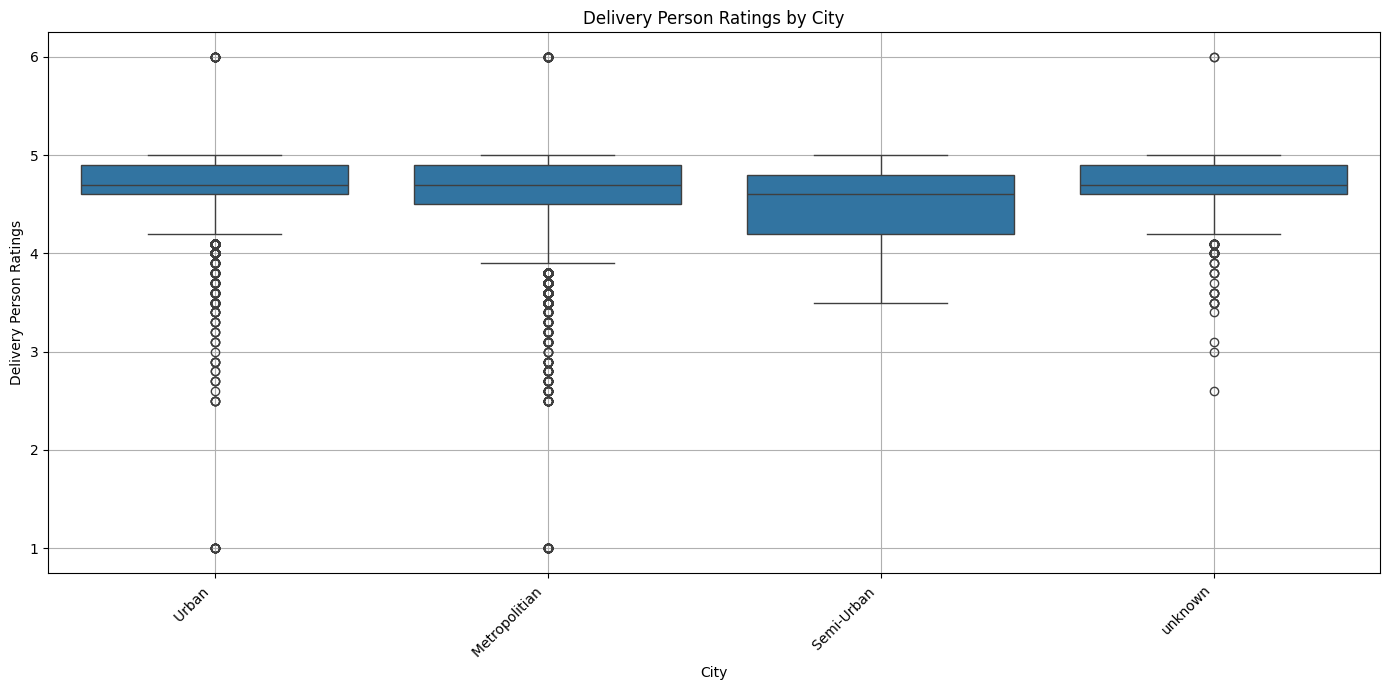

In [ ]:


plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y='Delivery_person_Ratings', data=df1)
plt.xlabel('City')
plt.ylabel('Delivery Person Ratings')
plt.title('Delivery Person Ratings by City')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## extra

In [ ]:
df1.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Day_of_Week',
       'Time_Difference_minutes'],
      dtype='object')

In [ ]:
df1=df1.drop(columns=['Time_Difference_minutes'])

In [ ]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week,Time_Difference_minutes
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday,15.0
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday,5.0
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday,15.0
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday,10.0
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday,15.0


In [ ]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Day_of_Week
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday


In [ ]:
df1.to_csv('cleaned_data.csv', index=False)